In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
import numpy as np 
import pandas as pd 
import os,cv2,random
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization 
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [2]:
print(os.listdir("flowers"))

['sunflower', 'dandelion', 'daisy', 'tulip', 'rose']


In [3]:
root_path = 'flowers'
classes = ['daisy', 'sunflower', 'tulip', 'rose', 'dandelion']
valid_ext = ['.jpg','.JPG']

In [32]:
img_size = 150
training_data = []
dim = (img_size, img_size)
for category in classes:
    path = os.path.join(root_path,category)
    count = 0
    for img  in tqdm(os.listdir(path)):
        if os.path.splitext(img)[1] in valid_ext:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array,dim)
            name_index = classes.index(category)
            training_data.append([new_array, name_index])

100%|██████████| 1055/1055 [00:12<00:00, 112.86it/s]


In [33]:
x_train = []
y_train = []
random.shuffle(training_data)
for features,label in training_data:
    x_train.append(features / 255.0)
    y_train.append(label)
x_train = np.array(x_train).reshape(-1,img_size,img_size,3)

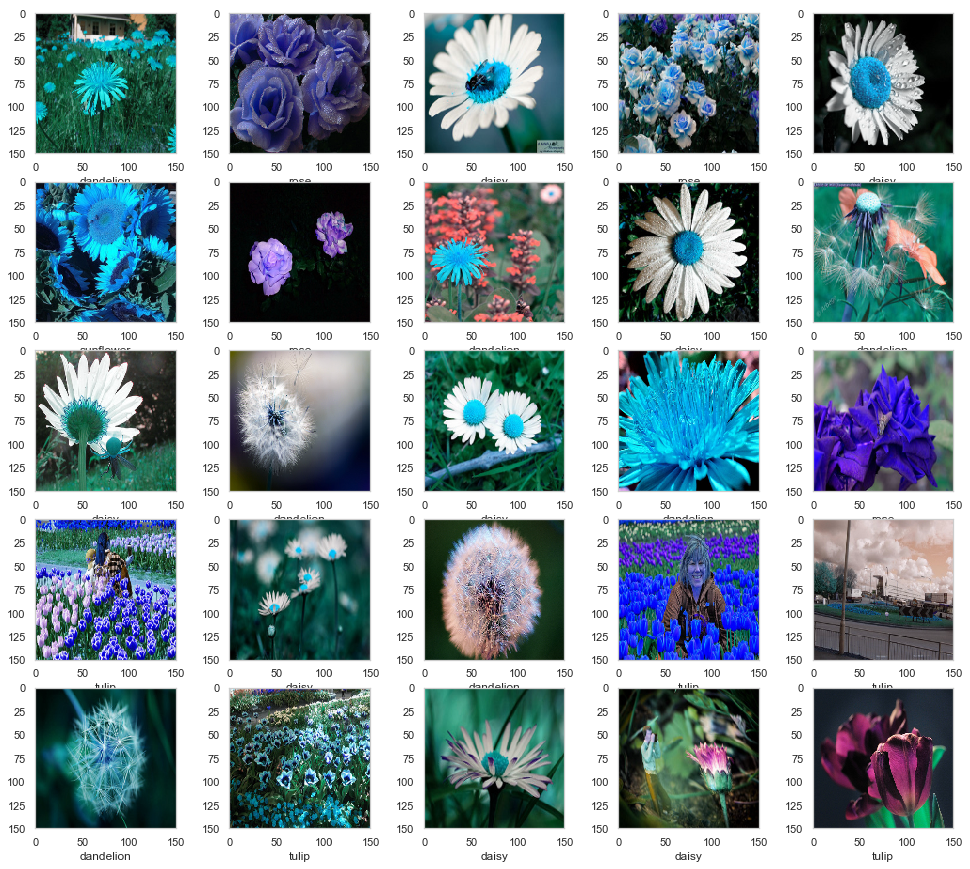

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])
    plt.grid(False)    
plt.show()
plt.tight_layout()

In [35]:
le=LabelEncoder()
Y=le.fit_transform(y_train)
Y=to_categorical(Y,5)
X=x_train


In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [37]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)


In [38]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),
                 padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))


In [39]:
batch_size=32
epochs=1
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [40]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,
        vertical_flip=False) 
datagen.fit(x_train)


In [41]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 96)        83040     
__________

In [43]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/1
101/101 [==============================] - 62s 618ms/step - loss: 1.3864 - acc: 0.3887 - val_loss: 1.1644 - val_acc: 0.5032


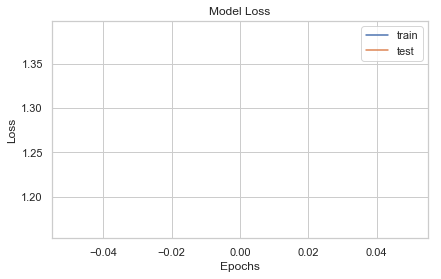

In [44]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

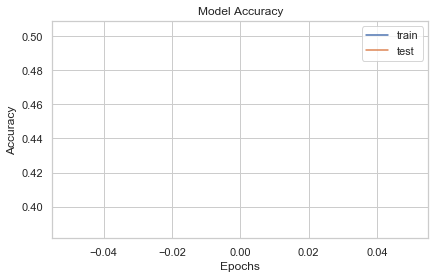

In [45]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [48]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [49]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

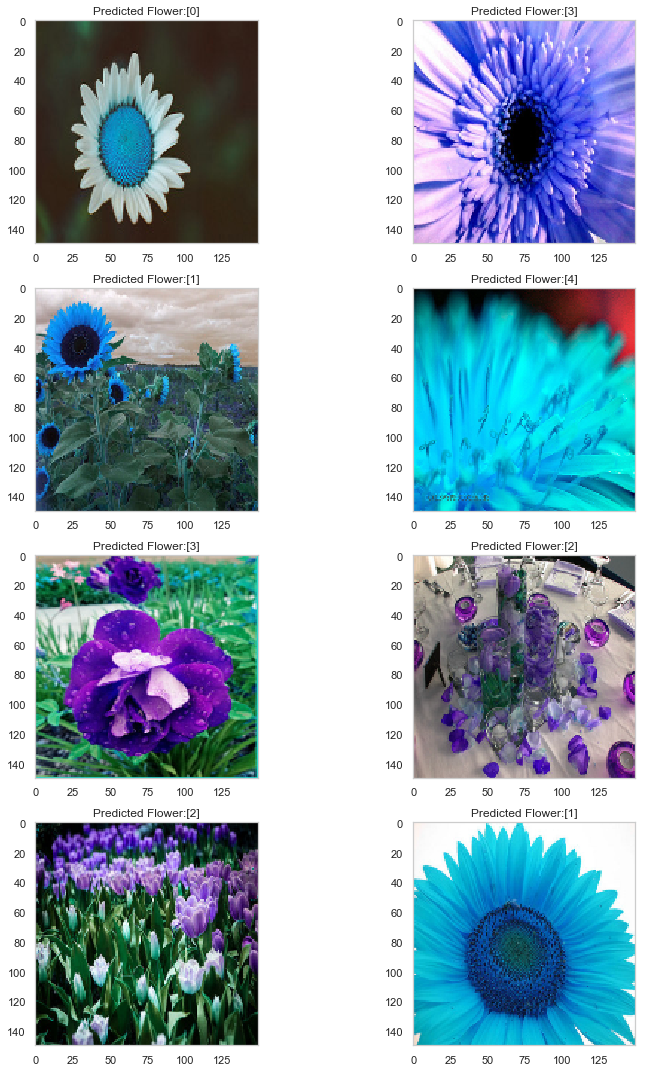

In [77]:
count=0 
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower:"+str(le.inverse_transform([pred_digits[prop_class[count]]]))) 
        ax[i,j].grid(False)
        plt.tight_layout() 
        plt.grid(False)
        count+=1     
plt.show()        

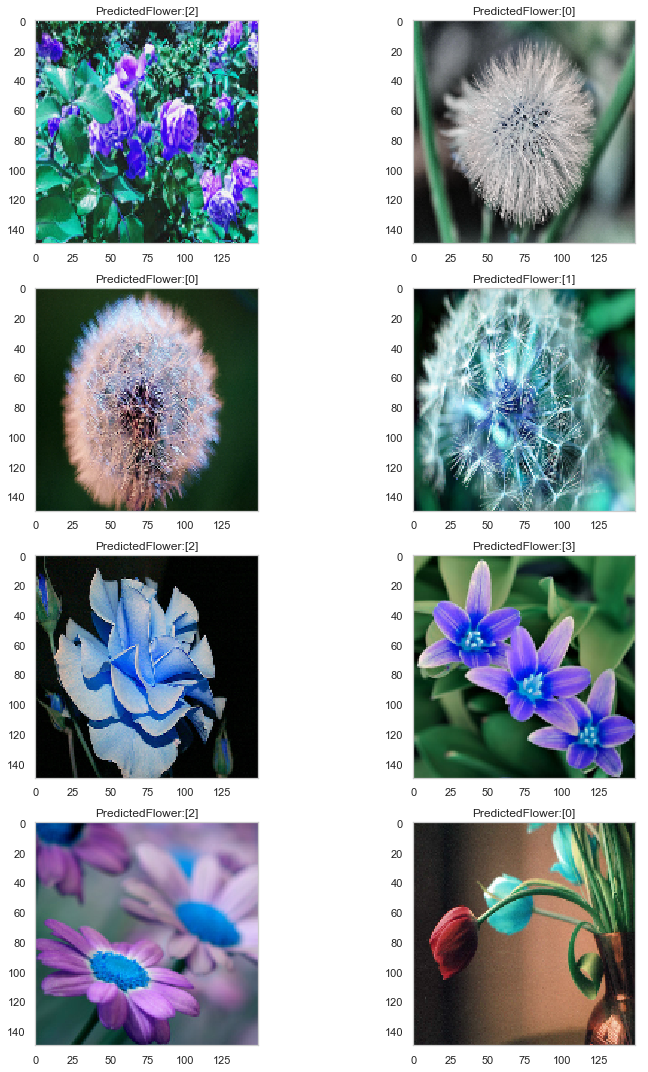

In [76]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].grid(False)
        ax[i,j].set_title("PredictedFlower:"+str(le.inverse_transform(
            [pred_digits[mis_class[count]]])))        
        plt.tight_layout()
        count+=1
plt.show()        